## Дерево решений


Начнем обзор методов классификации и регрессии с одного из самых популярных – с дерева решений. Деревья решений используются в повседневной жизни в самых разных областях человеческой деятельности, порой и очень далеких от машинного обучения. Деревом решений можно назвать наглядную инструкцию, что делать в какой ситуации.

Как выглядит это самое дерево решений? На нашем примере с фильмами.

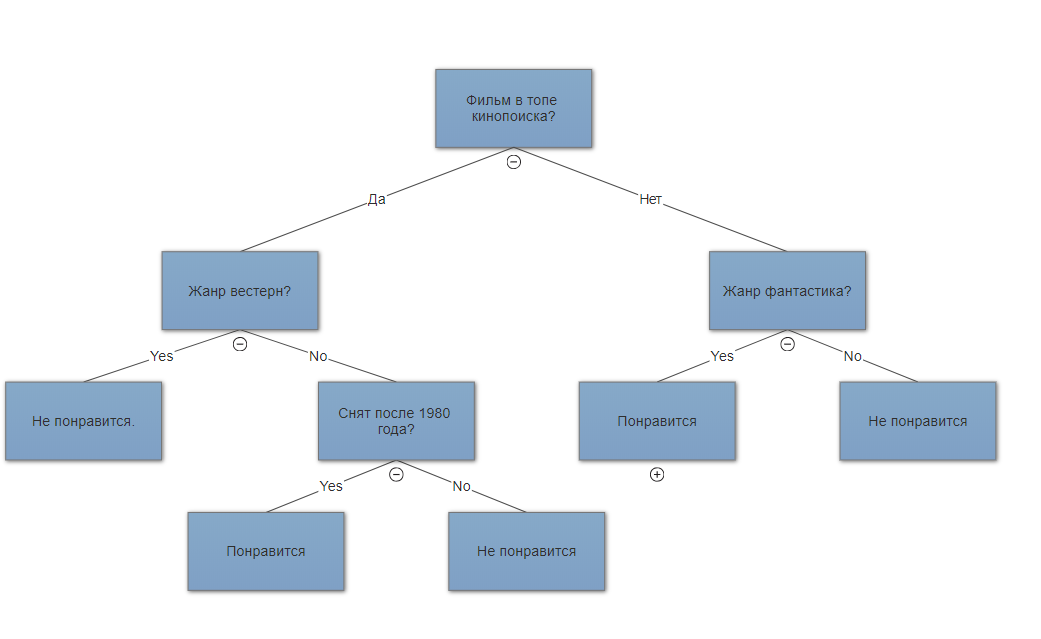

Зачастую дерево решений служит обобщением опыта экспертов или моделью бизнес-процесса компании.<br> Например, до внедрения масштабируемых алгоритмов машинного обучения в банковской сфере задача кредитного скоринга решалась экспертами. Решение о выдаче кредита заемщику принималось на основе некоторых выведенных правил, которые можно представить в виде дерева решений.

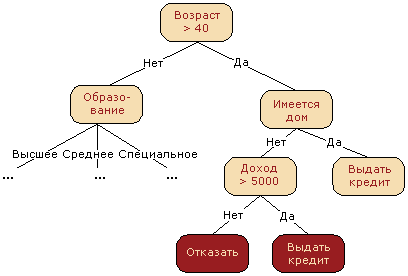

Дерево решений как алгоритм машинного обучения – по сути то же самое: объединение логических правил вида "Значение признака A меньше порога X, значение признака B меньше порога Y: ответ алгоритма - "Класс_1".<br>
Огромное преимущество деревьев решений в том, что они легко интерпретируемы - понятны человеку. Например, по схеме на рисунке выше можно объяснить заемщику, почему ему было отказано в кредите. Скажем, потому, что у него нет дома и доход меньше 5000.

## Как строится дерево решений


Прямо сейчас надо зайти к "акинатору" и сыграть с ним пару игр. <br>
Поиграли? <br>
Каждый из вопросов будет соответствовать узлу в дереве решений. <br>
Какие вопросы он задаёт в самом начале? Женщина или мужчина. Настоящий или вымышленный. Живой или мёртвый. <br>
Почему именно вопросы такого плана? Почему он сразу не спрашивает "Это Трамп?". Потому что это сильнее всего уменьшит количество оставшихся вариантов. Вопрос "Это Трамп?" в случае отрицательного ответа оставит всё множество вариантов для угадывания, а вот вопрос "Это женщина?" отсечет уже около половины вариантов. То есть, признак "пол" намного лучше разделяет выборку людей, чем признак "это Трамп?", "американец?" или "президент?". Это интуитивно соответствует понятию прироста информации, основанного на энтропии.

Создадим алгоритм построения дерева:<br>
1) Выбираем "лучший" параметр по которому можно разделить наши данные. (представим что "лучший" - тот что делит выборку пополам)<br>
2) Задаём вопрос по этому параметру<br>
3) Следуем по дереву согластно ответу (вниз по дереву либо "да" либо "нет")<br>
4) Выполняем пункт 1 пока не получим ответ<br>

Теперь проверим наше понимание. В данных ниже нам надо разделить крестики от ноликов при помощи вопроса который поделит выборку на 2 части.<br>
Какой из 3-х вариантов разделения лучший, почему?


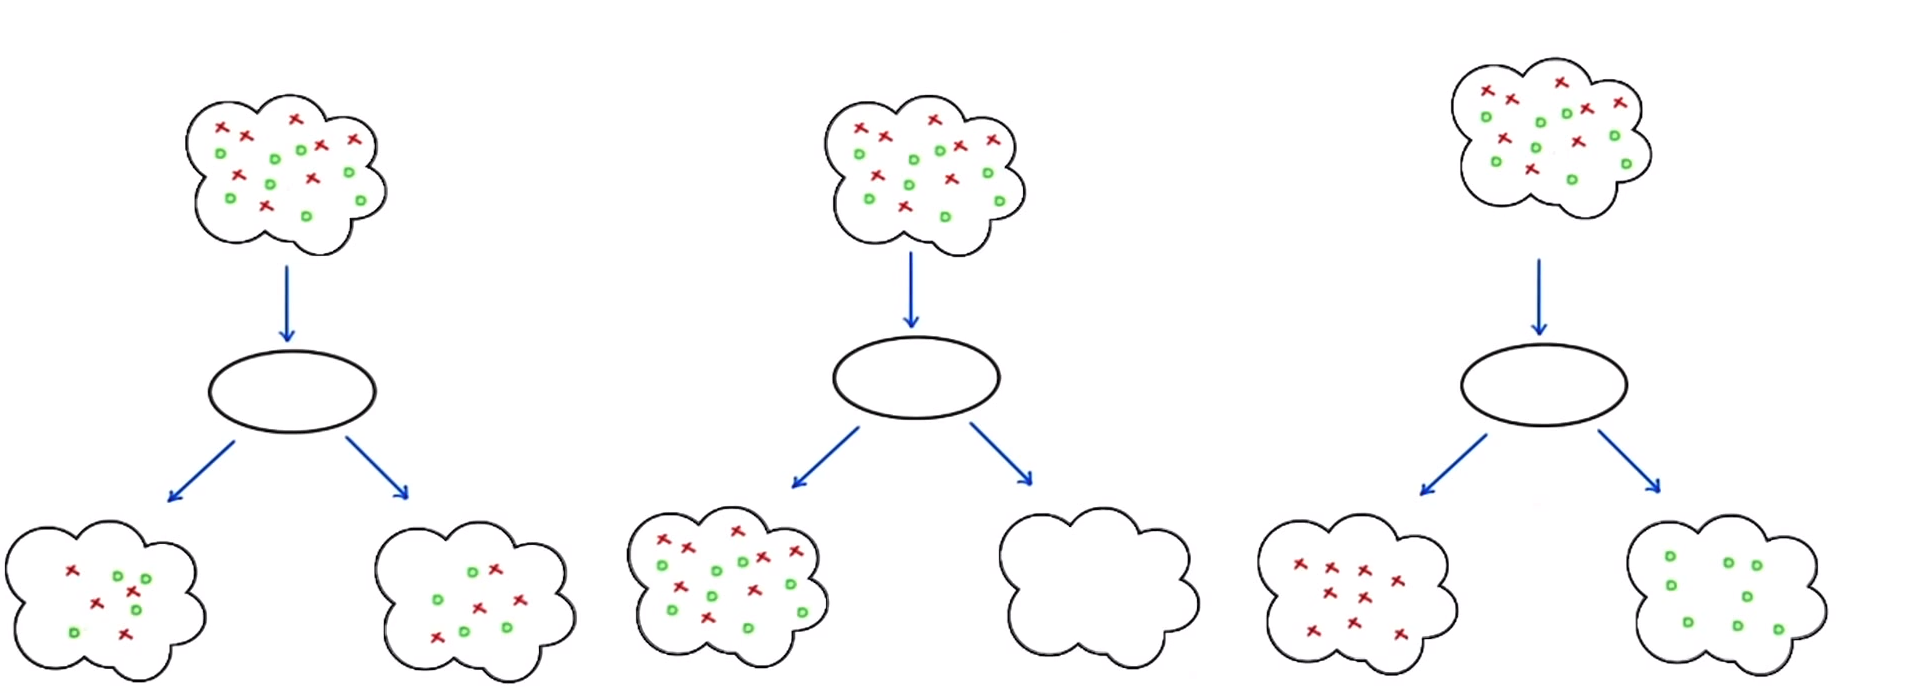

Деревья хорошо понятны с интуитивной точки зрения. Но что насчёт более формального описания, компьютер не может пользоваться интуицией. <br>
Волнующий момент, время познакомиться с первой формулой. Формула Энтропии Шеннона.

<h1><center>$\Large  S = -\sum_{i=1}^{N}p_ilog_2p_i$</center></h1>

где p_i – вероятности нахождения системы в i-ом состоянии. N - количество состояний<br>
Понятия энтропия соответствует степени хаоса в системе. Чем выше энтропия, тем менее упорядочена система и наоборот. Это поможет  формализовать "Эффективное разделение выборки".

Попробуем убедиться что формула не страшная через игрушечный пример.<br>
Нам надо предсказать цвет шарика по его координате.

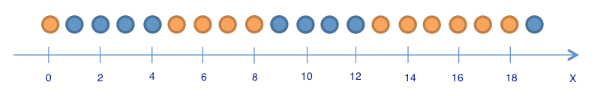

Сразу же применим наши новые знания и найдём энтропию системы. У нас имеется 11 жёлтых шариков и 9 синих. Если мы случайно будем вытаскивать шарики, то вероятность достать жёлтый шарик $ 11/20 $, а вероятность достать синий $ 9/20 $ <br>
Мы знаем вероятности в системе, а значит и для нахождения энтропии у нас есть всё необходимое

<h3><center>$S_0 = -\frac{9}{20}log_2{\frac{9}{20}}-\frac{11}{20}log_2{\frac{11}{20}} \approx 1$ </center></h3>

Сразу вспомним, что логарифм показывает нам в какую степень надо возвести основание (у нас 2), чтобы получить результат стояший рядом со знаком логарифма (у нас 9/20). Так логарифм по основанию 2, числа меньше единицы, будет отрицательным.

<center>$log_2{2} = 1$ <br></center>
<center>$log_2{8} = 3$ <br></center>
<center>$log_2{1} = 0$ <br></center>
<center>$log_2{\frac{9}{20}} \approx -1.152$ <br></center>

Поскольку вероятность не может быть больше 1, то в нашей формуле энтропии логарифм будет принимать не положительные значения (но может быть 0, если вероятность равна 1).<br>
Можно отвлечься от машинного обучения и посчитать чему равна энтропия при броске монеты (орёл-решко) и чему равна при броске игральной кости (1-2-3-4-5-6)

Теперь вернёмся к нашему обучению. Мы посчитали начальное значение энтропии $S_0$, но само это значение нам ничего не даёт. Давай те вспомним наш алгоритм построения дерева, выберем лучший параметр для разделения. Здесь у нас параметр только один это числовая прямая, так что по ней и будем делить. Разделим шарики на те, что больше 12 и те что меньше или равны


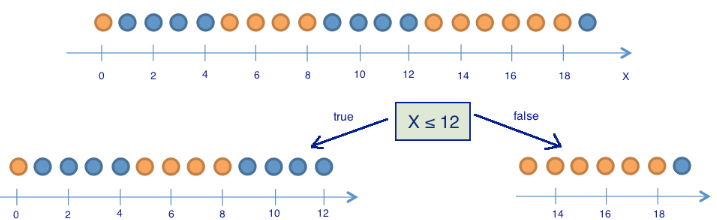

В левой группе оказалось 13 шаров, из которых 8 синих и 5 желтых. Энтропия этой группы равна<br>
<center><h3>$S_1 = -\frac{5}{13}log_2{\frac{5}{13}}-\frac{8}{13}log_2{\frac{8}{13}} \approx 0.96$ </center></h3><br>
В правой группе оказалось 7 шаров, из которых 1 синий и 6 желтых. Энтропия правой группы равна 
<center><h3>$S_2 = -\frac{1}{7}log_2{\frac{1}{7}}-\frac{6}{7}log_2{\frac{6}{7}} \approx 0.6$ </center></h3><br>
Как видим, энтропия уменьшилась в обеих группах по сравнению с начальным состоянием, хоть в левой и не сильно.<br>
Поскольку энтропия – по сути степень хаоса (или неопределенности) в системе, уменьшение энтропии называют приростом информации.<br>
Формально прирост информации (information gain, IG) при разбиении выборки по признаку Q (в нашем примере это признак $"x \leq 12"$) определяется как

<h1><center>$\Large IG(Q) = S_O - \sum_{i=1}^{q}\frac{|N_i|}{N}S_i,$</h1></center>

где q – число групп после разбиения, $N_i$ – число элементов выборки, у которых признак Q имеет $i$-ое значение. В нашем случае после разделения получилось две группы (q = 2) – одна из 13 элементов ($N_1$ = 13), вторая – из 7 ($N_2$ = 7).<br>
Прирост информации получился

<h1><center>$\Large IG("x\leq12") = S_0 - \frac{13}{20}S_1 - \frac{7}{20}S_2 \approx 0.16.$</h1></center>

Получается, разделив шарики на две группы по признаку "координата меньше либо равна 12", мы уже получили более упорядоченную систему, чем в начале. Продолжим деление шариков на группы до тех пор, пока в каждой группе шарики не будут одного цвета.

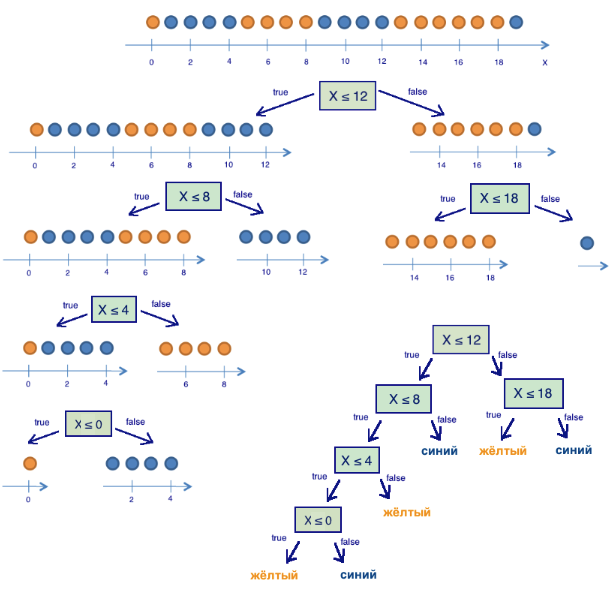

Уф, по большому счёту понятно как работают решающие деревья, теперь наконец то практика.<br>
Представим, что мы реиэлторская фирма и у нас есть данные по стоимости домов в Мельбурне, Австрия и нам надо научиться предсказывать стоимость для домов, которые будут выходить на рынок позже.

В первую очередь посмотрим на эти данные, как они выглядят. Можно открыть файл с расширением .csv в exel или любом другом редакторе.

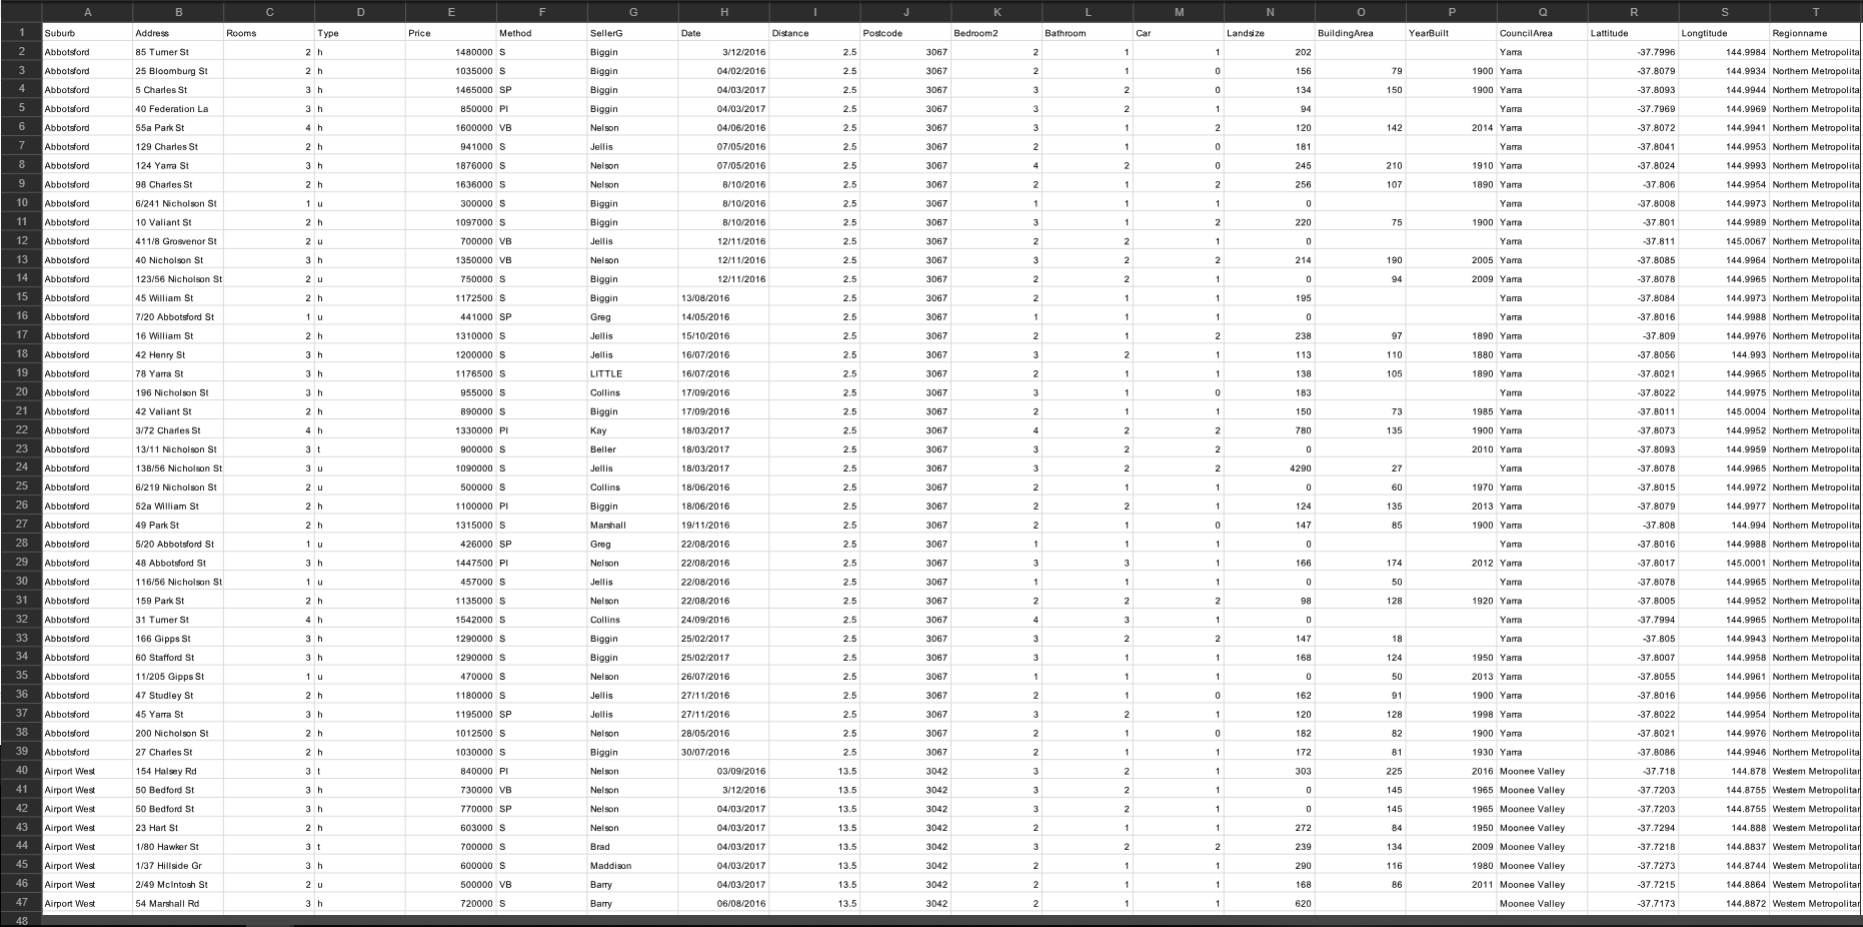

Данные о 13 тысячах домов, так что вручную их анализировать будет не просто

Теперь загрузим эти данные при помощи python.

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

Путь до данных в windows используется '\' разделитель

In [30]:
meld_data_file = '../data/melb_data.csv'

In [31]:
melbourne_data = pd.read_csv(meld_data_file) 

Убедимся что всё прочиталось и загрузилось корректно, для этого выведем несколько строк

In [32]:
melbourne_data.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Данные загрузились корректно, посмотрим на описание этих данных

In [33]:
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [34]:
melbourne_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
Suburb           13580 non-null object
Address          13580 non-null object
Rooms            13580 non-null int64
Type             13580 non-null object
Price            13580 non-null float64
Method           13580 non-null object
SellerG          13580 non-null object
Date             13580 non-null object
Distance         13580 non-null float64
Postcode         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13518 non-null float64
Landsize         13580 non-null float64
BuildingArea     7130 non-null float64
YearBuilt        8205 non-null float64
CouncilArea      12211 non-null object
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null object
Propertycount    13580 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 2.2+ MB


Метод scatter_matrix позволяет визуализировать попарные зависимости между признаками (а также распределение каждого признака на диагонали).

/root/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


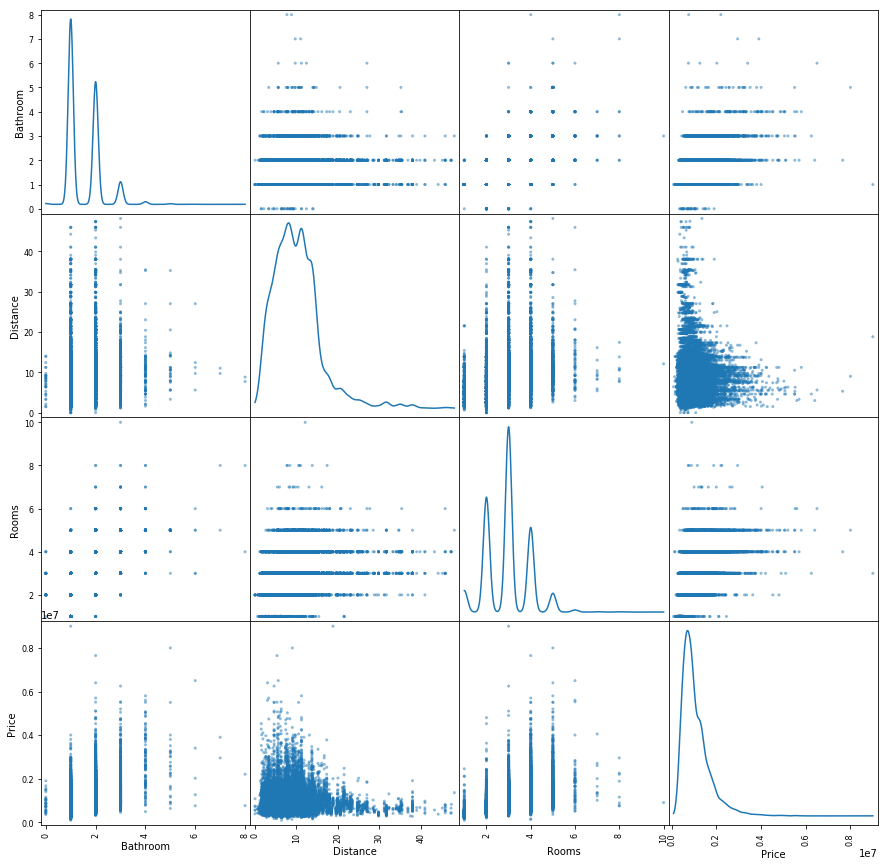

In [35]:
pd.scatter_matrix(melbourne_data[['Bathroom', 'Distance', 'Rooms', 'Price']], 
                  figsize=(15, 15), diagonal='kde')
plt.show()

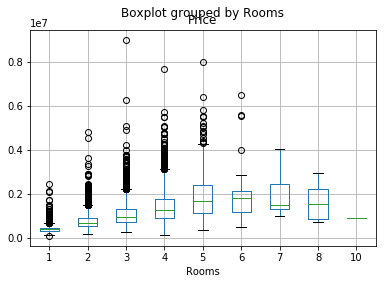

In [36]:
melbourne_data.boxplot(column='Price', by='Rooms')
plt.show()

Методики исследования данных это целая наука, пока мы не будем останавливается на этом подробнее.

In [37]:
features = ['Rooms','Distance','Bathroom','Bedroom2','Landsize', 'Lattitude', 'Longtitude']

In [38]:
X = melbourne_data[features]

In [39]:
X.describe()

,Rooms,Distance,Bathroom,Bedroom2,Landsize,Lattitude,Longtitude
count,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,10.137776,1.534242,2.914728,558.416127,-37.809203,144.995216
std,0.955748,5.868725,0.691712,0.965921,3990.669241,0.079260,0.103916
min,1.000000,0.000000,0.000000,0.000000,0.000000,-38.182550,144.431810
25%,2.000000,6.100000,1.000000,2.000000,177.000000,-37.856822,144.929600
50%,3.000000,9.200000,1.000000,3.000000,440.000000,-37.802355,145.000100
75%,3.000000,13.000000,2.000000,3.000000,651.000000,-37.756400,145.058305
max,10.000000,48.100000,8.000000,20.000000,433014.000000,-37.408530,145.526350


In [40]:
X.head(5)

,Rooms,Distance,Bathroom,Bedroom2,Landsize,Lattitude,Longtitude
0,2,2.5,1.0,2.0,202.0,-37.7996,144.9984
1,2,2.5,1.0,2.0,156.0,-37.8079,144.9934
2,3,2.5,2.0,3.0,134.0,-37.8093,144.9944
3,3,2.5,2.0,3.0,94.0,-37.7969,144.9969
4,4,2.5,1.0,3.0,120.0,-37.8072,144.9941


In [41]:
y = melbourne_data.Price

In [42]:
y.head(5)

0    1480000.0
1    1035000.0
2    1465000.0
3     850000.0
4    1600000.0
Name: Price, dtype: float64

In [43]:
from sklearn.tree import DecisionTreeRegressor

# Define model.
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

Теперь у нас есть обученная модель с помощью которой мы можем делать предсказания.<br>
Нас всегда будут интересовать предсказания цены для новых домов, а не для тех, информация по которым у нас уже имеется. Но всё равно, попробуем нашу модель на паре домов из нашей обучающей выборки, просто чтобы посмотреть как это работает.

In [44]:
print("Предсказываем стоимость для домов:")
print(X.head(5))
print("Предсказанная цена:")
print(melbourne_model.predict(X.head()))

Предсказываем стоимость для домов:
   Rooms  Distance  Bathroom  Bedroom2  Landsize  Lattitude  Longtitude
0      2       2.5       1.0       2.0     202.0   -37.7996    144.9984
1      2       2.5       1.0       2.0     156.0   -37.8079    144.9934
2      3       2.5       2.0       3.0     134.0   -37.8093    144.9944
3      3       2.5       2.0       3.0      94.0   -37.7969    144.9969
4      4       2.5       1.0       3.0     120.0   -37.8072    144.9941
Предсказанная цена:
[1480000. 1035000. 1465000.  850000. 1600000.]


In [45]:
melbourne_data.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Теперь опишем шаги построения и использования нашей модели:
 - Определение (Define): Какой тип модели нам нужен? Дерево решений или может любая другая модель? Так же определяются параметры модели
 - Обучение (Fit): Модель определяет шаблоны в предоставленных данных.
 - Предсказание (Predict): Предсказываем целевую переменную
 - Оценка (Evaluate): Определяем качество полученной модели

С первыми 3-мя шагами мы справились, а с оценкой, пока не так ясно.<br>
Мы конечно посмотрели на предсказания для 5-ти домов, вручную и похоже всё верно, но оценивать таким образом нашу выборку в 13 тысяч домов не представляется возможным. По этому нам надо ввести какую то <b>метрику</b> автоматического определения качества. Как мы могли бы это определить?

На самом деле метрик качества очени много, но мы можем начать с самой простой - средня абсолютная ошибка (<b>Mean Absolute Error - MAE<b>). Формула выглядит очень просто.

<h3><center>$error = | actual - predicted |$</center></h3>

По сути мы просто вычитаем из реальной цены дома предсказанную. Модуль используем потому что нам не важно, обсчитались мы в меньшую или большую сторону. Если дом стоит 50 000, а мы предсказали 45 000, то это такая же ошибка как если бы мы предсказали 55 000.<br>
Ну и конечно, это ошибка для одного примера, одного дома, а у нас их много, по этому надо посчитать ошибку по всем домам

<h3><center>$error = \sum_{i=1}^{N}| actual_i - predicted_i |$</center></h3>

Но абстрактное понятие ошибки у нас будет расти с увеличением количества примеров в выборке. Если мы предсказываем стоимость для 10 домов и в каждом ошиблись на 1000 руб, то сумма ошибки будет 10 000 руб, а если мы будем предсказывать стоимость для 1000 домов и ошибёмся всего на 50 руб, то по нашей формуле ошибка будет 50 000 руб. Хотя во втором случае наша модель работает гораздо лучше, наша ошибка говорит иначе. По этому давайте усредним ошибку, поделив на количество экземпляров предсказания.

<h3><center>$error = \frac{1}{N}\sum_{i=1}^{N}| actual_i - predicted_i |$</center></h3>

Теперь парамерт $error$, нам говорит на сколько в среднем мы ошибамся в стоимости дома.

In [46]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

978.3714285714284

Но мы совершили ошибку с оценке нашей точности. Мы взяли данные на которых обучали нашу модель, а потом по ним же оцениваем качество. Наша модель уже видела эти данные, конечно она их запомнила и покажет на них хороший результат. Надо помнить о том, что наша цель, как риэлторской организации будет предсказывать стоимость домов которые в будущем будут выходить на рынок, а не тех, которые мы уже продали. <br>
По этому делать оценку по тем же данным, которые мы использовали для обучения это просто жульничество, чтобы успокоить самих себя.

Как действовать в этой ситуации? Самый простой вариант, это не показывать модели все данные которые у нас имеются, а оставить часть, для того чтобы потом оценить качество.<br>
Это один из ключевых аспектов в машинном обучении. Мы разделяем данные которые у нас имеются на 2 части: тренировочные (<b>train set</b>) и проверочные(<b>validation set</b>). Разделение по умолчанию 80/20

Попробуем реализовать это в нашем коде. Разделяем данные на 2 части, обучаем модель на train data, проверяем качество на validation data.

In [47]:
import numpy as np
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

243081.97849779087


Уф! Вначале мы видили ошибку в наших предсказаниях в районе 1к\\$, а теперь 250к\\$. <br>

При средней стоимости дома в 

In [48]:
y.mean()

1075684.079455081

Наша ошибка в 250к ознчает что мы ошибаемся в среднем на четверть стоимости.

А что было бы, если бы мы всегда предсказывали среднюю стоимость дома?

In [49]:
always_predict_mean_price = np.zeros(val_y.shape)
always_predict_mean_price[:] = train_y.mean()
print(mean_absolute_error(val_y, always_predict_mean_price))

467881.1358562037


Наша модель всё же лучше простого усреднения, но всё равно не может быть использованна на практике.

Если мы вернёмся к нашему примеру с цветными шариками, то увидим, что даже для простой задачи, дерево получилось довольно внушительное. Дерево ветвится до тех пор пока у него не получится идеальный лист (<b>leaf</b>). И во время обучения такой модели всё хорошо, но когда мы начинаем проверять её качество на новых данных, выясняется что обучается модель очень плохо. <br>

Давайте посмотрим на то, как наше дерево выглядит

In [50]:
import re
import IPython, graphviz
from sklearn.tree import export_graphviz
def draw_tree(t, df, size=10, ratio=0.6, precision=0):
    """ Draws a representation of a random forest in IPython.

    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    """
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}', s)))

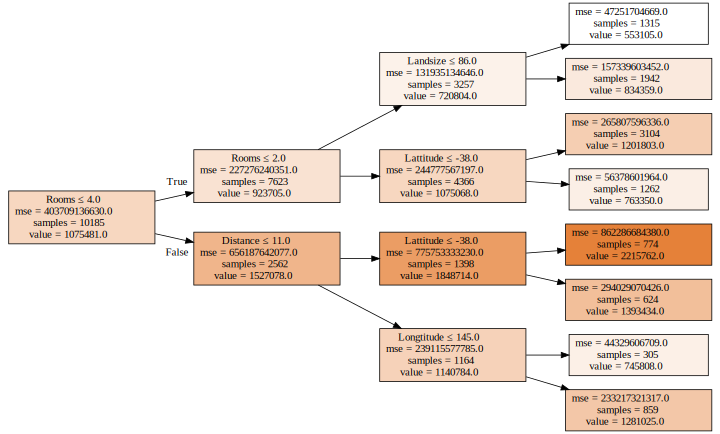

In [51]:
melbourne_graph_model = DecisionTreeRegressor(max_depth=3)
melbourne_graph_model.fit(train_X, train_y)
draw_tree(melbourne_graph_model, train_X)

Попробуйте поменять в строке DecisionTreeRegressor(max_depth=3) параметр max_depth 2-3-4-5-6-8

Это феномен называется переобучение (<b>overfitting</b>), алгоритм всеми силами пытается сделать ошибку на обучающей выборке меньше, начиная разделять дерево даже по тем параметрам, которые не влияют на цену в общем, но улучшают ответ на конкретной выборке. С другой стороны, если мы будем строить только не глубокие деревья, то алгорим не сможет разделить дома даже по важным признакам и результат будет неважным даже на тренировочной выборке.  Это называется недообучение (<b>underfitting</b>)

Так что нам надо найти идеальную точку между переобученной и недобученной моделью. Визуально график качества модели в зависимости от глубины дерева выглядит так

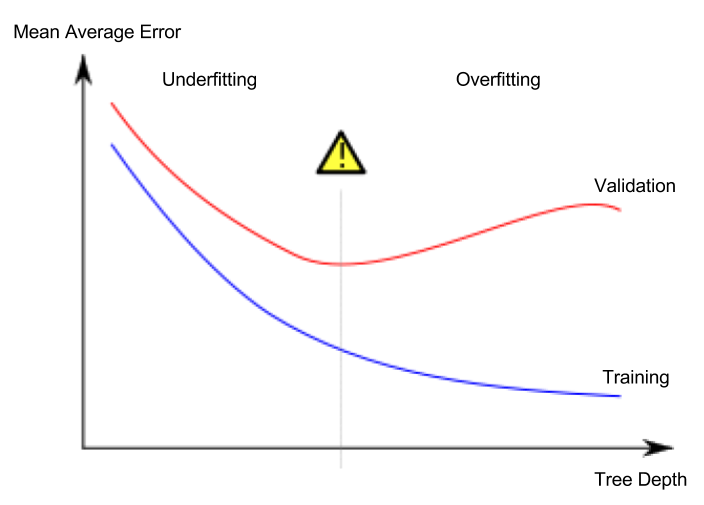

Помним, что нас волнует качество только для новых данных, так что ориентируемся на красную линию.

Ещё проще понять переобучение и недообучение при взгляде на график, который строит дерево.

Тут мы воспользуемся не нашими данными по домам, а сгенериуем точки таким образом, что по большому счёту они легко разделяются на два класса. Конечно всегда есть некоторые точки, которые мы определяем неверно. Но для задач машинного обучения это абсолютно нормально. В любых данных есть шум или ошибки. Может кто то при заполнении базы домов неверно установил цену, может кто то указал площадь с лишним нулём, кому то надо было срочно продать дом и он стоил гораздо дешевле рынка. Такие ситуации в данных нормальны и ожидаемы нами и наши алгоритмы должны быть готовы к этому так же. 

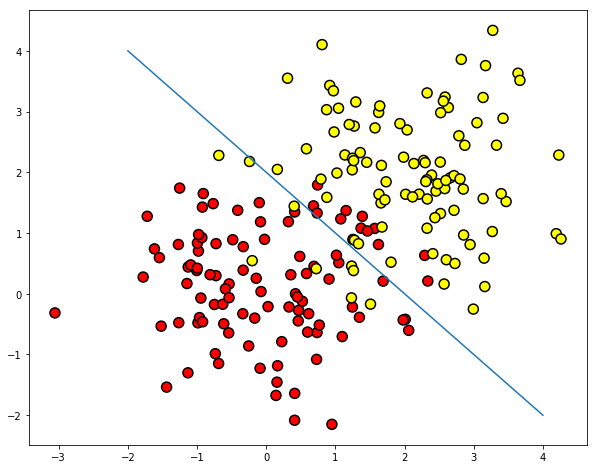

In [52]:
def get_grid(data, eps=0.01):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, eps),
                         np.arange(y_min, y_max, eps))

# первый класс
# np.random.seed(7)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5)
plt.plot(range(-2,5), range(4,-3,-1));

Теперь попробуем классифицировать эти точки при помощи дерева. Попробуйте поменять параметр max_depth и посмотреть как меняется функция классификации.

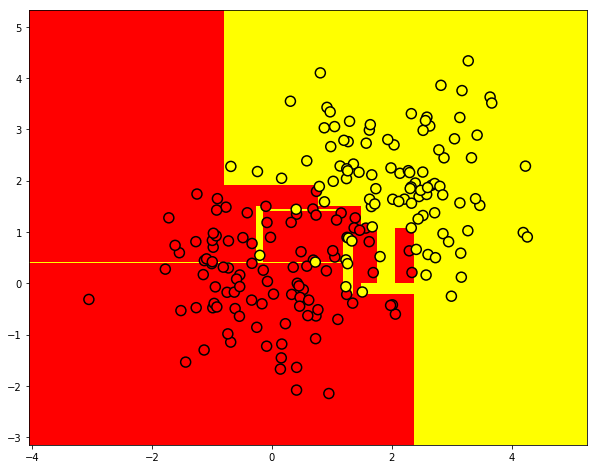

In [53]:
from sklearn.tree import DecisionTreeClassifier
# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=17)

# обучаем дерево
clf_tree.fit(train_data, train_labels)

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);

Теперь выставим параметр max_depth = 30, это большое значение для наших данных и модель явно получается переобученной под данные из тренировочной выборки. Теперь посмотрим как эта разделяющая плоскость будет выглядеть на новых данных из абсолютно такого же распределения. 

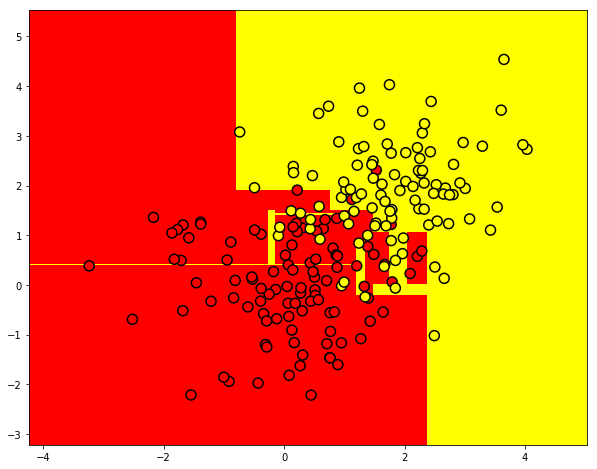

In [54]:
# первый класс
# np.random.seed(7)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);

При внимательном рассмотрении графика, мы увидим лишние красные и жёлтые островки в ненужных местах. Это всё из-за того, что модель слишком подстроилась под изначальные данные.

Есть несколько возможностей для контроля глубины дерева, можно это делать указав максимальную глубину. А можно сказать алгоритму, что в листе дерева не должно быть меньше определённого количества данных.<br>
Попробуем посмотреть как меняется качество модели, в зависимости от того, сколько домов оказывается в листе дерева.

In [55]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [56]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  372899
Max leaf nodes: 50  		 Mean Absolute Error:  251534
Max leaf nodes: 500  		 Mean Absolute Error:  225064
Max leaf nodes: 5000  		 Mean Absolute Error:  241774


При помощи такой опции мы улучшили предсказание на 20к $

Заглянем чуть вперёд и используем композицию из деревьев под названием случайный лес и посмотрим как он работает.

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=3)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

/root/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


189020.92405919067


Улучшили результат ещё на 35к 

Случайные леса заслуживают отдельного обсуждения, это очень сильные и устойчивый алгоритм, но поговорим мы о них с следующий раз. А заодно и улучшим наш риэлторский алгоритм.

<h2>Плюсы и минусы деревьев решений</h2>
<h3>Плюсы:</h3>

Порождение четких правил классификации, понятных человеку, например, "если возраст < 25 и интерес к мотоциклам, то отказать в кредите". Это свойство называют интерпретируемостью модели;

Деревья решений могут легко визуализироваться, как сама модель (дерево), так и прогноз для отдельного взятого тестового объекта (путь в дереве);

Быстрые процессы обучения и прогнозирования;

Малое число параметров модели;

Поддержка и числовых, и категориальных признаков.


<h3>Минусы:</h3>

У порождения четких правил классификации есть и другая сторона: деревья очень чувствительны к шумам во входных данных, вся модель может кардинально измениться, если немного изменится обучающая выборка (например, если убрать один из признаков или добавить несколько объектов), поэтому и правила классификации могут сильно изменяться, что ухудшает интерпретируемость модели;

Разделяющая граница, построенная деревом решений, имеет свои ограничения (состоит из гиперплоскостей, перпендикулярных какой-то из координатной оси), и на практике дерево решений по качеству классификации уступает некоторым другим методам;

Необходимость отсекать ветви дерева (pruning) или устанавливать минимальное число элементов в листьях дерева или максимальную глубину дерева для борьбы с переобучением. Впрочем, переобучение - проблема всех методов машинного обучения;

Нестабильность. Небольшие изменения в данных могут существенно изменять построенное дерево решений. С этой проблемой борются с помощью ансамблей деревьев решений;

Проблема поиска оптимального дерева решений (минимального по размеру и способного без ошибок классифицировать выборку) NP-полна, поэтому на практике используются эвристики типа жадного поиска признака с максимальным приростом информации, которые не гарантируют нахождения глобально оптимального дерева;

Сложно поддерживаются пропуски в данных. Friedman оценил, что на поддержку пропусков в данных ушло около 50% кода CART (классический алгоритм построения деревьев классификации и регрессии – Classification And Regression Trees, в sklearn реализована улучшенная версия именно этого алгоритма);

Модель умеет только интерполировать, но не экстраполировать (это же верно и для леса и бустинга на деревьях). То есть дерево решений делает константный прогноз для объектов, находящихся в признаковом пространстве вне параллелепипеда, охватывающего все объекты обучающей выборки. В нашем примере с желтыми и синими шариками это значит, что модель дает одинаковый прогноз для всех шариков с координатой > 19 или < 0.